# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pandas import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Bring in URL for future
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="

#New DataFrame to stor the data
weather_df=pd.DataFrame()

count=0
#For loop to query openweathermap.org bases on rando cities from list.  Read values with Json into a dataframe
for city in cities:
    city_data=requests.get(query_url+city+'&units=imperial').json()
    weather_df=weather_df.append(json_normalize(city_data))
    count=count+1
    print(f'{city} is city {count}')

albany is city 1
san cristobal is city 2
tuatapere is city 3
ostrovnoy is city 4
marcona is city 5
new norfolk is city 6
avenal is city 7
nioro is city 8
ribeira grande is city 9
antalaha is city 10
carnarvon is city 11
ushuaia is city 12
constitucion is city 13
hovd is city 14
punta arenas is city 15
castro is city 16
hermanus is city 17
faanui is city 18
iskateley is city 19
taolanaro is city 20
cumaribo is city 21
vao is city 22
bredasdorp is city 23
smithers is city 24
saint-michel-des-saints is city 25
dingle is city 26
busselton is city 27
sitka is city 28
airai is city 29
djambala is city 30
upernavik is city 31
erenhot is city 32
clyde river is city 33
ponta delgada is city 34
meridian is city 35
rikitea is city 36
ambodifototra is city 37
kaeo is city 38
jamestown is city 39
guerrero negro is city 40
praia da vitoria is city 41
havelock is city 42
ballina is city 43
puerto ayora is city 44
huilong is city 45
qaanaaq is city 46
lebu is city 47
nanortalik is city 48
luderitz is 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Rename columns in data frame
weather_df=weather_df.rename(columns={'coord.lon':'Lon', 'coord.lat':'Lat', 'main.temp_max':'Max Temp', 'wind.speed':
                                     'Wind Speed', 'main.humidity':'Humidity', 'clouds.all':'Cloud Cover', 'sys.country':'Country'})
#Write renamed file to .csv
weather_df=pd.DataFrame(weather_df)
weather_df.to_csv('weather_df.csv')

In [5]:
#Looking at cod value.  Those with 400 means no city data could be returned
weather_df=weather_df[weather_df['cod']==200]

len(weather_df)

547

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
hum_df=weather_df
hum_df=hum_df[hum_df['Humidity']>100]
hum_df

,weather,base,dt,timezone,id,name,cod,Lon,Lat,main.temp,...,sys.type,sys.id,Country,sys.sunrise,sys.sunset,main.sea_level,main.grnd_level,message,visibility,snow.1h


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data=weather_df.drop(hum_df.index, axis=0, inplace=False)
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=pd.DataFrame(clean_city_data)

clean_city_data

,weather,base,dt,timezone,id,name,cod,Lon,Lat,main.temp,...,sys.type,sys.id,Country,sys.sunrise,sys.sunset,main.sea_level,main.grnd_level,message,visibility,snow.1h
0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,1.588986e+09,-14400.0,5106841.0,Albany,200,-73.97,42.60,37.80,...,3.0,19530.0,US,1.588931e+09,1.588983e+09,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,1.588986e+09,-14400.0,3628473.0,San Cristobal,200,-72.22,7.77,67.73,...,NaN,NaN,VE,1.588934e+09,1.588979e+09,1014.0,909.0,NaN,NaN,NaN
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,1.588986e+09,43200.0,2180815.0,Tuatapere,200,167.68,-46.13,62.31,...,NaN,NaN,NZ,1.588968e+09,1.589003e+09,1019.0,1015.0,NaN,NaN,NaN
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,1.588986e+09,10800.0,556268.0,Ostrovnoy,200,39.51,68.05,30.09,...,NaN,NaN,RU,1.588981e+09,1.589051e+09,1008.0,1006.0,NaN,NaN,NaN
0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,1.588986e+09,36000.0,2155415.0,New Norfolk,200,147.06,-42.78,50.63,...,3.0,2031307.0,AU,1.588972e+09,1.589008e+09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,1.588986e+09,34200.0,2077895.0,Alice Springs,200,133.88,-23.70,66.20,...,1.0,9483.0,AU,1.588973e+09,1.589013e+09,NaN,NaN,NaN,10000.0,NaN
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,1.588986e+09,10800.0,523392.0,Naryan-Mar,200,53.09,67.67,30.52,...,NaN,NaN,RU,1.588978e+09,1.589047e+09,1011.0,1011.0,NaN,NaN,NaN
0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,1.588986e+09,7200.0,3129371.0,Arroyo de la Encomienda,200,-4.80,41.61,54.91,...,1.0,6437.0,ES,1.589001e+09,1.589052e+09,NaN,NaN,NaN,10000.0,NaN
0,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,1.588986e+09,-28800.0,5861897.0,Fairbanks,200,-147.72,64.84,66.16,...,1.0,7684.0,US,1.588942e+09,1.589007e+09,NaN,NaN,NaN,16093.0,NaN


In [8]:
# Extract relevant fields from the data frame
clean_city_data=clean_city_data.filter(['name','Lon', 'Lat', 'Max Temp','Wind Speed', 'Humidity', 'Cloud Cover', 'Country'], axis=1)
clean_city_data=clean_city_data.sort_values('Lat')
# Export the City_Data into a csv
clean_city_data.to_csv('clean_city_data.csv')
clean_city_data

,name,Lon,Lat,Max Temp,Wind Speed,Humidity,Cloud Cover,Country
0,Ushuaia,-68.30,-54.80,46.40,4.70,75.0,20.0,AR
0,Punta Arenas,-70.92,-53.15,41.00,6.93,86.0,100.0,CL
0,Bluff,168.33,-46.60,57.29,7.85,73.0,0.0,NZ
0,Kaitangata,169.85,-46.28,60.01,4.00,60.0,0.0,NZ
0,Mataura,168.86,-46.19,59.83,3.47,62.0,0.0,NZ
...,...,...,...,...,...,...,...,...
0,Khatanga,102.50,71.97,25.34,21.94,95.0,100.0,RU
0,Upernavik,-56.15,72.79,21.47,10.25,90.0,100.0,GL
0,Dikson,80.55,73.51,23.68,14.20,95.0,9.0,RU
0,Qaanaaq,-69.36,77.48,8.40,6.96,80.0,0.0,GL


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperatures(F)')

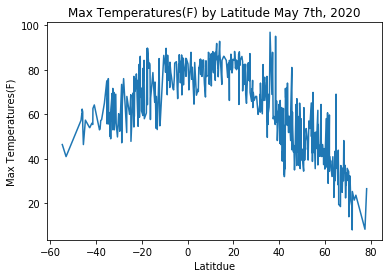

In [9]:
#Create variable lists to plot.  wd_lat for latitude, wd_temp for temp, etc...
wd_lat=clean_city_data['Lat']
wd_temp=clean_city_data['Max Temp']

plt.plot(wd_lat, wd_temp)
plt.title("Max Temperatures(F) by Latitude May 7th, 2020")
plt.xlabel("Latitdue")
plt.ylabel('Max Temperatures(F)')

In [ ]:
#Code is looking at the maximum temperature from the city list and plotting it by latitude.  
#We can see max temperature distributed over the various latitudes

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

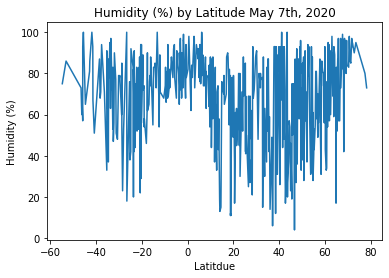

In [10]:
#Create variable lists to plot. Adding Humidity to plot
wd_hum=clean_city_data['Humidity']

plt.plot(wd_lat, wd_hum)
plt.title("Humidity (%) by Latitude May 7th, 2020")
plt.xlabel("Latitdue")
plt.ylabel('Humidity (%)')

In [ ]:
#Code is looking at the humidity reading from the city list and plotting it by latitude.  
#We can see humidity distributed over the various latitudes

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

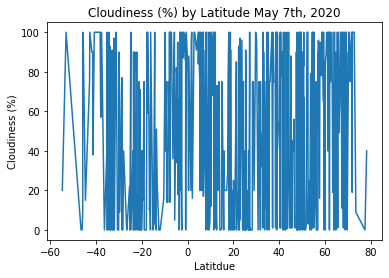

In [11]:
#Add variable list for Cloudiness
wd_cloud=clean_city_data['Cloud Cover']

plt.plot(wd_lat, wd_cloud)
plt.title("Cloudiness (%) by Latitude May 7th, 2020")
plt.xlabel("Latitdue")
plt.ylabel('Cloudiness (%)')

In [ ]:
#Code is looking at the percent cloudiness reading from the city list and plotting it by latitude.  
#We can see percent cloudiness distributed over the various latitudes

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mpg)')

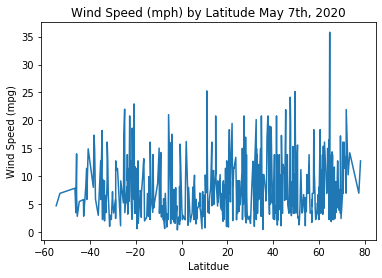

In [12]:
#Add variable list for Wind speed
wd_wind=clean_city_data['Wind Speed']

plt.plot(wd_lat, wd_wind)
plt.title("Wind Speed (mph) by Latitude May 7th, 2020")
plt.xlabel("Latitdue")
plt.ylabel('Wind Speed (mpg)')

In [ ]:
#Code is looking at the average wind speed reading from the city list and plotting it by latitude.  
#We can see average wind speed distributed over the various latitudes

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# Will come back to

In [13]:
# Create Northern and Southern Hemisphere DataFrames
no_hem=clean_city_data[clean_city_data['Lat']>0]
so_hem=clean_city_data[clean_city_data['Lat']<0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.87


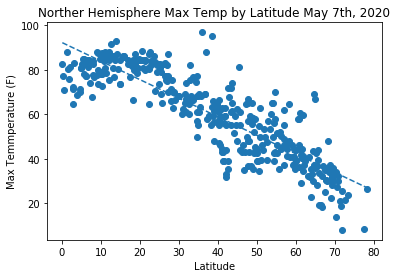

In [14]:
#Bring in pearsonr to calculate correlation between variables.  will call correlation
x=no_hem['Lat']
y=no_hem['Max Temp']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.xlabel('Latitude')
plt.ylabel("Max Temmperature (F)")
plt.title("Norther Hemisphere Max Temp by Latitude May 7th, 2020")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.71


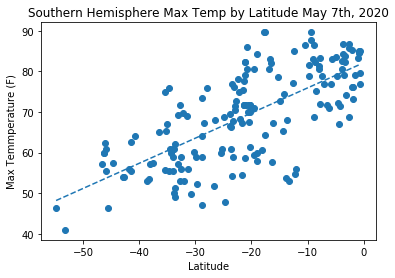

In [15]:
#Repeat for southern hem.  
x=so_hem['Lat']
y=so_hem['Max Temp']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.xlabel('Latitude')
plt.ylabel("Max Temmperature (F)")
plt.title("Southern Hemisphere Max Temp by Latitude May 7th, 2020")
plt.show()

In [ ]:
#Max Temp vs. Latitude Linear Regression for norther and southern hemispheres is plotting lat vs max tem and determining the pearson-r correlation value
#We see farily strong pearson-r correlation coefficient value for both northern and southern hemishpheres comparing Latitude with max Temp, indicating a stroung correlation.
#Trend is temperatures increase toward the equator (i.e. Lat = 0.0)
#As one gets closer to the equator, those sections of the earth recieve more direct sunlight than latitudes closer to the poles, hence warming this regions more.
#Correlation is slightly stronger in Northern hemisphere (-0.87 to 0.71)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.08


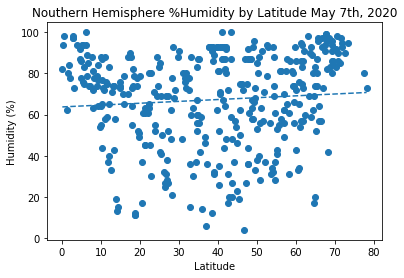

In [16]:
#Repeat for humidty
x=no_hem['Lat']
y=no_hem['Humidity']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("Nouthern Hemisphere %Humidity by Latitude May 7th, 2020")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15


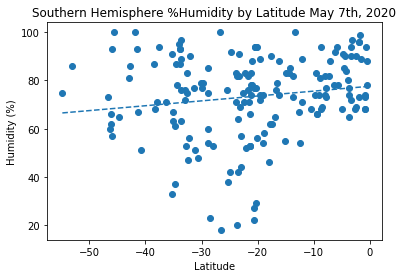

In [17]:
#Repeat for humidty in southern hemisphere
x=so_hem['Lat']
y=so_hem['Humidity']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere %Humidity by Latitude May 7th, 2020")
plt.show()

In [ ]:
#There is not a strong correlation between latitiude and humidity measurments for either norther or southern hemisphere.
#Humidity is more likely influenced by natrual surroundings and climate (location to mountains, trees, proximity to ocean, altitude, than by latitude.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09


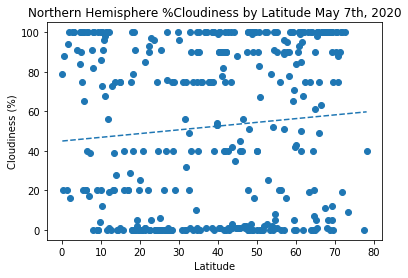

In [18]:
#Repeat for cloudiness in northern hemisphere
x=no_hem['Lat']
y=no_hem['Cloud Cover']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.title("Northern Hemisphere %Cloudiness by Latitude May 7th, 2020")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1


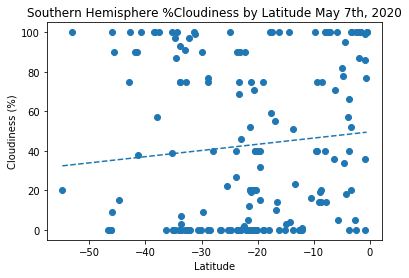

In [19]:
#Repeat for humidty in southern hemisphere
x=so_hem['Lat']
y=so_hem['Cloud Cover']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.title("Southern Hemisphere %Cloudiness by Latitude May 7th, 2020")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

In [ ]:
# With correlation values of 0.1 and 0.09 for the southern and northern hemispheres respectively, we see little correlation between % cloudiness and latitude
# Would be interesting to compare humidity to cloudiness and look for any correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.15


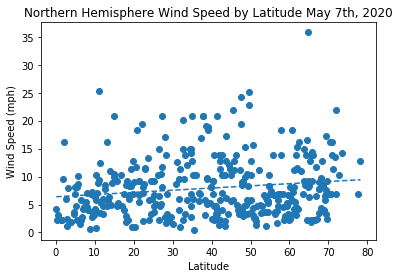

In [20]:
#Repeat for wind speed in norther hemisphere
x=no_hem['Lat']
y=no_hem['Wind Speed']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.title("Northern Hemisphere Wind Speed by Latitude May 7th, 2020")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.13


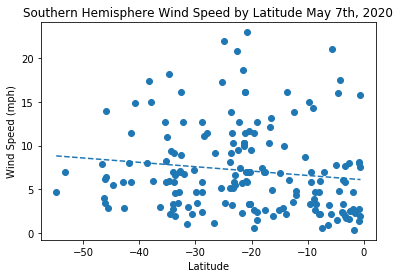

In [21]:
#Repeat for wind speed in outhern hemisphere
x=so_hem['Lat']
y=so_hem['Wind Speed']
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
cp_fit = cp_slope * x + cp_int

plt.scatter(x,y)
plt.plot(x,cp_fit,"--")
plt.title("Southern Hemisphere Wind Speed by Latitude May 7th, 2020")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()

In [32]:
#We see little correlation between latitude and measurements other than maximum temperature for the data analyzed.
#Max temp had strong correlation with latitude in both norther and southern hemispheres, -0.87 and 0.71 respectively.  Closer to 0 Latitude the hotter it gets due to more direct sunlight.
#We see little correlation between latitude and humidity, wind speed, and cloudiness for both hemispheres.
#In neither hemisphere for any of ther above fields (humidity, wind speed, cloudiness) did we have an a pearson-r correlation value greater than 0.2 or less than -0.2.
#This indicate minimal correlation between latitude and humidity, wind speed and cloudiness
#Latitude and the amout of direct sunlight has a storng correlation and drive temperature for places around the world, other city information like altitude would be interesting to correlate to maximum temperature too.
#Humidity, wind speed and cloudiness are likely more stongly coordinated to other climate features than latitude.  These can be affected by climate and terrain.
#It should be noted that this dataset while containing over 500 cities around the world is only from May 7th, 2020.
#Looking at this information seasonally or over mulitple days would make stronger case for correlation.